**Our Problem Statement is to analyze the dataset of properties in Lahore and then building a model to predict its price using location, Area(Sq.ft), bedrooms, baths...**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('Property_with_Feature_Engineering.csv')

In [31]:
df.head(2)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B


In [32]:
## Checking which cities of Pakistan are present in the dataset
print(df['city'].unique())


['Lahore' 'Karachi' 'Islamabad' 'Faisalabad' 'Rawalpindi']


In [33]:
df.shape

(191393, 24)

In [37]:
data = df[df['city']=='Lahore']
data.shape

(58736, 24)

In [38]:
# dropping unnecessary columns

col_names = ["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"]
data = data.drop(col_names, axis=1)

In [39]:
data = data.reset_index()
data = data.drop("index",axis=1)
data.head()

,price,location,baths,area_sqft,bedrooms
0,220000000,Model Town,0,32670.12,0
1,40000000,Multan Road,5,5445.02,5
2,9500000,Eden,0,2450.26,3
3,125000000,Gulberg,7,5445.02,8
4,21000000,Allama Iqbal Town,5,2994.76,6


In [40]:
data.isnull().sum()

price        0
location     0
baths        0
area_sqft    0
bedrooms     0
dtype: int64

In [41]:
data['bedrooms'].unique()

array([ 0,  5,  3,  8,  6,  4,  2,  7,  1, 10, 11,  9, 14, 12, 13, 18, 15,
       16, 25, 20])

In the above cell, there are some properties which have bedrooms even greater than 10...This could be possible that some of them could be typo error while others can be having other errors in them as well like very less baths or no baths...Lets inspect the properties that are having bedrooms more than 13

In [42]:
data[data['bedrooms']>13]

,price,location,baths,area_sqft,bedrooms
1099,100000000,Garden Town,0,10890.04,14
19710,650000000,Gulberg,0,25047.09,18
21817,175000000,Shah Jamal,0,26136.10,15
28454,350000000,Gulberg,0,17424.06,16
38558,175000000,Shah Jamal,0,26136.10,15
39985,960000000,Gulberg,0,43560.16,25
51998,960000000,Gulberg,0,43560.16,25
53342,1000000,Gulberg,0,21780.08,20
57580,300000,Habibullah Road,0,8712.03,20


In [43]:
data['baths'].unique()

array([ 0,  5,  7,  6,  4,  3,  2,  8,  1, 10,  9, 11, 12, 15])

In [44]:
data = data.drop(data[(data['baths']==0) & (data['bedrooms'] > 3)].index)
data

,price,location,baths,area_sqft,bedrooms
0,220000000,Model Town,0,32670.12,0
1,40000000,Multan Road,5,5445.02,5
2,9500000,Eden,0,2450.26,3
3,125000000,Gulberg,7,5445.02,8
4,21000000,Allama Iqbal Town,5,2994.76,6
...,...,...,...,...,...
58730,32000,Allama Iqbal Town,0,2722.51,2
58732,185000,DHA Defence,6,5445.02,5
58733,150000,DHA Defence,5,2722.51,4
58734,70000,DHA Defence,3,5445.02,3


In the above cell we have dropped those indexes that are having no baths and having bedrooms greater than 3 cause they can probably be a typo error.

In [45]:
data.drop(data[data['bedrooms']==0 | (data['baths']==0)].index, inplace=True)


We have also dropped those properties that are either having no bedrooms or no baths in the above cell...

In [47]:
data[data["baths"] > data["bedrooms"]].head(25)

,price,location,baths,area_sqft,bedrooms
5,52000000,Gulberg,6,5445.02,5
6,16500000,Military Accounts Housing Society,7,2178.01,6
11,87500000,Upper Mall,5,6534.02,4
17,50000000,Agrics Town,7,4900.52,6
19,27500000,Askari,5,3267.01,4
21,50000000,Upper Mall,6,5445.02,5
22,45000000,Askari,6,5445.02,5
24,21200000,Askari,4,2722.51,3
25,23000000,Askari,5,2722.51,4
26,21500000,Askari,5,2722.51,4


Look at the above cell , as there are more number of baths than bedrooms and its very uncommon

In [48]:
data['Price_per_sqft'] = data['price']/data['area_sqft']

In [49]:
data.head()

,price,location,baths,area_sqft,bedrooms,Price_per_sqft
0,220000000,Model Town,0,32670.12,0,6733.981999
1,40000000,Multan Road,5,5445.02,5,7346.162181
2,9500000,Eden,0,2450.26,3,3877.139569
3,125000000,Gulberg,7,5445.02,8,22956.756816
4,21000000,Allama Iqbal Town,5,2994.76,6,7012.248060


In the above cell, We have added one new column for our Feature Engineering so that we can remove outliers easily.

In [50]:
len(data['location'].unique())

637

In [51]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(20)

location
DHA Defence                   10666
Bahria Town                    6178
Johar Town                     2830
Askari                         1592
Allama Iqbal Town              1324
Wapda Town                     1277
Gulberg                        1209
State Life Housing Society     1067
Model Town                      940
Cantt                           869
Al Rehman Garden                783
Paragon City                    783
Sabzazar Scheme                 625
Samanabad                       607
Pak Arab Housing Society        587
Bahria Orchard                  584
Eden                            538
Valencia Housing Society        483
DHA 11 Rahbar                   471
Township                        470
Name: location, dtype: int64

In [52]:
len(location_stats[location_stats <= 10])

356

Notice that there are 356 locations that are having properties less than 10 so we can categorize them as others which will help us in dimensionality reduction in our machine learning model.

In [53]:
locations10 = location_stats[location_stats <= 10]
data['location'] = data['location'].apply(lambda x:'others' if x in locations10 else x)

In [54]:
data['location'].nunique()

282

Firstly there were 356 locations now we have 282 unique locations after dimensionality reduction.

In [55]:
data[data['area_sqft'] / data['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,Price_per_sqft
23,3200000,Chungi Amar Sadhu,2,816.75,3,3917.967554
35,5500000,others,3,680.63,3,8080.748718
71,6000000,Allama Iqbal Town,2,544.50,3,11019.283747
72,5500000,Allama Iqbal Town,2,544.50,3,10101.010101
119,4500000,Al Faisal Town,3,544.50,3,8264.462810
...,...,...,...,...,...,...
58510,24000,Harbanspura,0,816.75,3,29.384757
58513,16000,Canal Bank Housing Scheme,0,544.50,3,29.384757
58519,8500,Gulberg,1,299.48,1,28.382530
58523,6000,Gulberg,1,299.48,1,20.034727


In the above cell we assume that on  minimum a bedroom must be more than 300 sq.ft so those that were not following that rule in our data we will be removing them as they will be considering them as outliers...

In [56]:
data.drop(data[data['area_sqft'] / data['bedrooms'] < 300].index, inplace = True)

In [57]:
data['Price_per_sqft'].describe()

count     47030.000000
mean       5878.357118
std        4442.900641
min           0.000735
25%          47.750054
50%        6795.200018
75%        8631.740563
max      106519.742883
Name: Price_per_sqft, dtype: float64

Notice how much it is having standard deviation we are going to reduce it...

In [60]:
# removing price_per_sqft outliers 

def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key,subdata in data.groupby('location'):
        m = np.mean(subdata['Price_per_sqft'])
        std = np.std(subdata['Price_per_sqft'])
        reduced_data = subdata[(subdata['Price_per_sqft'] > (m-std)) & (subdata['Price_per_sqft'] <= (m+std))]
        data_out = pd.concat([data_out,reduced_data], ignore_index=True)
    return data_out

In [61]:
data = remove_pps_outliers(data)
data.shape

(31002, 6)

In [62]:
import matplotlib
def plot_scatter_chart(data, location):
    bedroom_2 = data[(data['location'] == location) & (data['bedrooms'] == 2)]
    bedroom_3 = data[(data['location'] == location) & (data['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

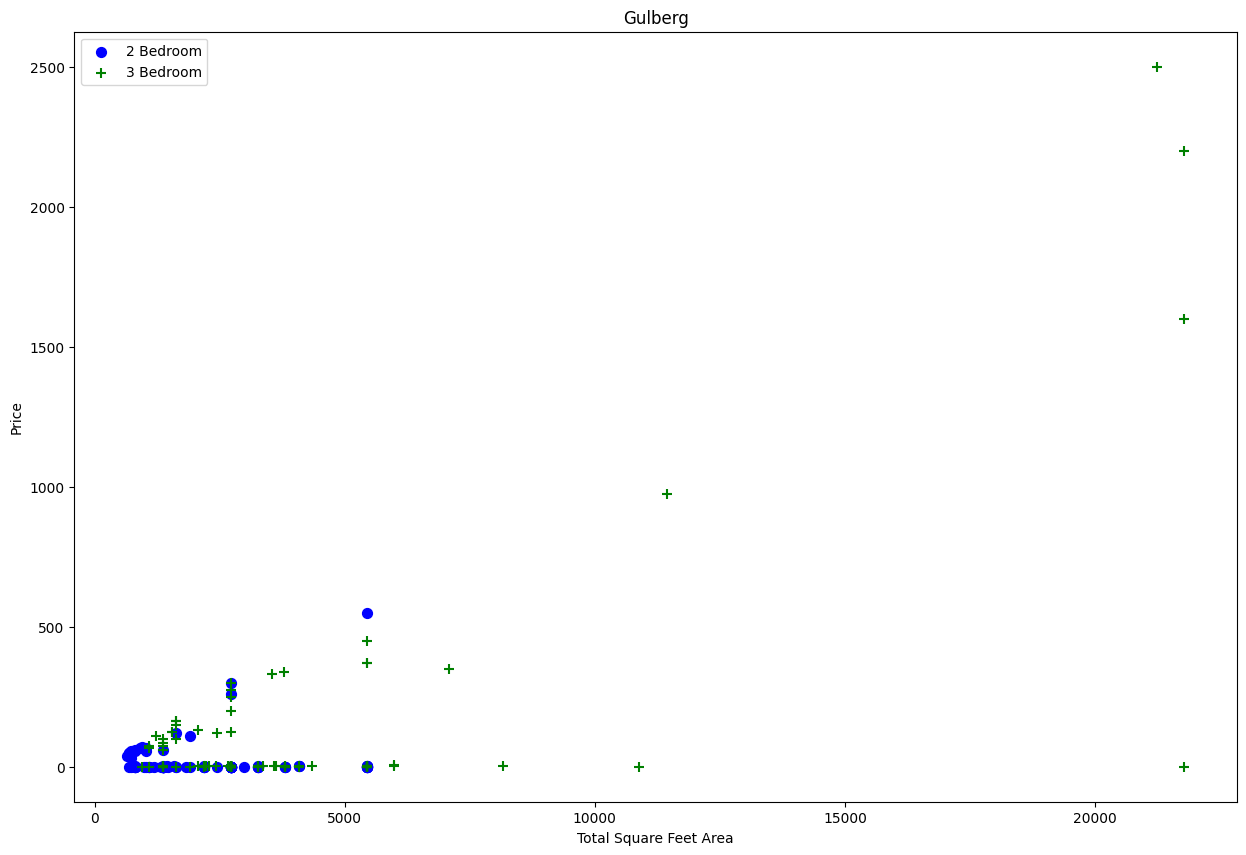

In [64]:
plot_scatter_chart(data, "Gulberg")

Notice in the above graph that there are some properties having 3 bedrooms still in less price than 2 bedrooms properties in a specfied location. Now they can also be considered as outliers and we should also remove them so that they cannot affect our model performance